In [20]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original',data_home="./datasets")


In [21]:
X,y=mnist["data"],mnist["target"]
print(X.shape)

(70000, 784)


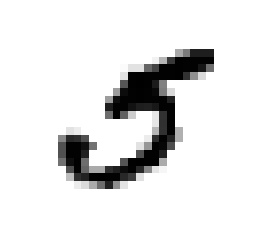

In [22]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
#cmap=matplotlib.cm.binary   二值化
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [23]:
y[36000]

5.0

In [24]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [25]:
#打乱顺序
import numpy as np
shuffe_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffe_index],y_train[shuffe_index]
print(X_train.shape)

(60000, 784)


In [26]:
y_train_5=(y_train == 5)
y_test_5=(y_test == 5)


In [27]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [28]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

对性能的评估 评估一个分类器，通常比评估一个回归器更加玄学。所以我们将会花大量的篇幅在这个话题上。有许多量度性能的方法，所以拿来一杯咖啡和准备学习许多新概念和首字母缩略词吧。StratifiedKFold类实现了分层采样（详见第二章的解释），生成的折（fold）包含了各类相应比例的样例。在每一次迭代，上述代码生成分类器的一个克隆版本，在训练折（training folds）的克隆版本上进行训，在测试折（test folds）上进行预测。然后它计算出被正确预测的数目和输出正确预测的比例。

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96615


D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9611


D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96525


让我们使用cross_val_score()函数来评估SGDClassifier模型，同时使用 K 折交叉验证，此处让k=3。记住：K 折交叉验证意味着把训练集分成 K 折（此处 3 折），然后使用一个模型对其中一折进行预测，对其他折进行训练

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\X64\anaconda\lib\site-packages\sklearn\linear_m

array([ 0.96615,  0.9611 ,  0.96525])

cross_val_predict()输出预测结果

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\X64\anaconda\lib\site-packages\sklearn\linear_m

In [32]:
print(y_train_pred)
print(y_train_pred.shape)

[False False False ..., False False False]
(60000,)


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53804,   775],
       [ 1375,  4046]], dtype=int64)

一个有趣的指标是正例预测的精度，也叫做分类器的准确率（precision）。

Scikit-Learn 提供了一些函数去计算分类器的指标，包括准确率和召回率。

In [38]:
from sklearn.metrics import precision_score,recall_score
#precision_score(y_train_5,y_pred)
print(precision_score(y_train_5,y_train_pred))
recall_score(y_train_5,y_train_pred)

0.839244969923


0.74635676074524993

通常结合准确率和召回率会更加方便，这个指标叫做“F1 值”，特别是当你需要一个简单的方法去比较两个分类器的优劣的时候。F1 值是准确率和召回率的调和平均。普通的平均值平等地看待所有的值，而调和平均会给小的值更大的权重。所以，要想分类器得到一个高的 F1 值，需要召回率和准确率同时高。

In [39]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.79008006248779539

In [42]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=5,
                          method="decision_function")
print(y_scores.shape)

D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\X64\anaconda\lib\site-packages\sklearn\linear_m

(60000,)


In [43]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

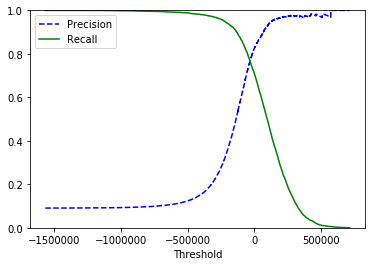

In [44]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

受试者工作特征（ROC）曲线是另一个二分类器常用的工具。它非常类似与准确率/召回率曲线，但不是画出准确率对召回率的曲线，ROC 曲线是真正例率（true positive rate，另一个名字叫做召回率）对假反例率（false positive rate, FPR）的曲线。FPR 是反例被错误分成正例的比率。它等于 1 减去真反例率（true negative rate， TNR）。TNR是反例被正确分类的比率。TNR也叫做特异性。所以 ROC 曲线画出召回率对（1 减特异性）的曲线。

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

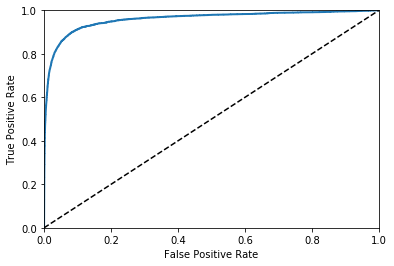

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.95921822258736578

让我们训练一个RandomForestClassifier，然后拿它的的ROC曲线和ROC AUC数值去跟SGDClassifier的比较。首先你需要得到训练集每个样例的数值。但是由于随机森林分类器的工作方式，RandomForestClassifier不提供decision_function()方法。相反，它提供了predict_proba()方法。Skikit-Learn分类器通常二者中的一个。predict_proba()方法返回一个数组，数组的每一行代表一个样例，每一列代表一个类。数组当中的值的意思是：给定一个样例属于给定类的概率。比如，70%的概率这幅图是数字 5。

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
print(y_probas_forest)


[[ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 ..., 
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.9  0.1]]


In [52]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

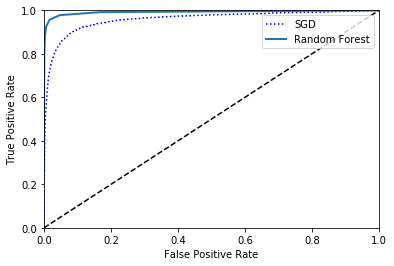

In [55]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="upper right")
plt.show()

In [54]:
roc_auc_score(y_train_5, y_scores_forest)

0.99224904479969378

In [56]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])


D:\X64\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 5.])

In [58]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-146086.0603843 , -535271.69700361, -288629.74635941,
        -162818.99481803, -277730.09400549,   33501.53981425,
        -749472.18785506, -396726.07755534, -604623.3251795 ,
        -582234.37107158]])

In [59]:
np.argmax(some_digit_scores)

5

In [60]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [61]:
forest_clf.fit(X_train, y_train)
pre__=forest_clf.predict([some_digit])
print(pre__)

[ 5.]


In [62]:
forest_clf.predict_proba([some_digit])

array([[ 0.1,  0.1,  0. ,  0.1,  0. ,  0.7,  0. ,  0. ,  0. ,  0. ]])